<a href="https://colab.research.google.com/github/Tanuja2725/Visualization/blob/main/_advertising_data_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# Last amended: 13th August 2022
# Data source: Kaggle: https://www.kaggle.com/fayomi/advertising
#
# Spyder note: Use F9 in Spyder to execute a line and advance
#
# objectives:
#           Discover relationships and existence of pattern
#           in data
#              i)  Feature Engineering for categorical variables
#             ii)  Extracting datetime components
#             iii) Behaviour of 'apply' vs 'map' for Series
#              iv)  Learning to draw various types of graphs
#               v)  Conditional plots using sns.catplot
#              vi)  Relationship plots using sns.relplot
#             vii)  Learning seaborn plots
#            viii)  Looking at structure in data
#                       a. Parallel coordinates plots
#                       b. Radviz plots
#                       c. Andrews curves

# Good reference: https://seaborn.pydata.org/introduction.html


## Call libraries

In [ ]:
# 1.0 Call libraries
%reset -f
# 1.1 For data manipulations
import numpy as np
import pandas as pd
from numpy.random import default_rng

# 1.2 For plotting
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl     # For creating colormaps

# 1.3 For data processing
from sklearn.preprocessing import StandardScaler

# 1.4 OS related
import os
# 1.5 for working in ipython
#%matplotlib qt5
#%matplotlib inline


In [ ]:
#1.6 From a cell display outputs from multiple commands:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
# 1.6.1 For generating random numbers:
rng = default_rng()

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:

with open('/gdrive/My Drive/foo.txt', 'w') as f:
  f.write('Hello Google Drive!')
!cat '/gdrive/My Drive/foo.txt'

19

Hello Google Drive!

In [ ]:

# 1.7 Mount google drive:
from google.colab import drive
drive.mount('/xyz')

Mounted at /xyz


In [ ]:
# 1.8 Go to folder containing data file
path="/xyz/MyDrive/colab_data_ files/14_08_022/1408"

In [ ]:
# 1.8.1 Change working directory
os.chdir(path)

# 1.8.2 list files
os.listdir()            # List all files in the folder


['advertising.zip', 'ad_processed.csv', 'ad_processed.pkl']

## Read data

In [ ]:
# 1.9 Read file and while reading file,
#      convert feature named 'Timestamp' 
#       to datetime time:

ad = pd.read_csv("advertising.zip",
                    parse_dates = ['Timestamp']    # Parse this column as dates
)

In [ ]:
ad.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


## Explore data

In [ ]:
# 1.9.1 Check data types of attributes
#       Should 'Age' be int64?
#       Try np.iinfo('int64'); np.finfo('float64')

ad.dtypes

Daily Time Spent on Site           float64
Age                                  int64
Area Income                        float64
Daily Internet Usage               float64
Ad Topic Line                       object
City                                object
Male                                 int64
Country                             object
Timestamp                   datetime64[ns]
Clicked on Ad                        int64
dtype: object

In [ ]:
# 1.9.2
ad.head(3)
ad.info()               # Also informs how much memory dataset takes
                        #   and status of nulls

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Daily Time Spent on Site  1000 non-null   float64       
 1   Age                       1000 non-null   int64         
 2   Area Income               1000 non-null   float64       
 3   Daily Internet Usage      1000 non-null   float64       
 4   Ad Topic Line             1000 non-null   object        
 5   City                      1000 non-null   object        
 6   Male                      1000 non-null   int64         
 7   Country                   1000 non-null   object        
 8   Timestamp                 1000 non-null   datetime64[ns]
 9   Clicked on Ad             1000 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(3)
memory usage: 78.2+ KB


In [ ]:
ad.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [ ]:
ad.columns.values

array(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'], dtype=object)

In [ ]:
ad.values

array([[68.95, 35, 61833.9, ..., 'Tunisia',
        Timestamp('2016-03-27 00:53:11'), 0],
       [80.23, 31, 68441.85, ..., 'Nauru',
        Timestamp('2016-04-04 01:39:02'), 0],
       [69.47, 26, 59785.94, ..., 'San Marino',
        Timestamp('2016-03-13 20:35:42'), 0],
       ...,
       [51.63, 51, 42415.72, ..., 'Mongolia',
        Timestamp('2016-02-01 17:24:57'), 1],
       [55.55, 19, 41920.79, ..., 'Guatemala',
        Timestamp('2016-03-24 02:35:54'), 0],
       [45.01, 26, 29875.8, ..., 'Brazil',
        Timestamp('2016-06-03 21:43:21'), 1]], dtype=object)

In [ ]:
ad['Age'].values

array([35, 31, 26, 29, 35, 23, 33, 48, 30, 20, 49, 37, 48, 24, 33, 23, 37,
       41, 36, 40, 30, 35, 52, 36, 41, 28, 28, 52, 34, 22, 35, 28, 57, 23,
       57, 30, 53, 39, 46, 39, 29, 30, 32, 31, 25, 52, 20, 43, 37, 46, 23,
       28, 45, 50, 47, 31, 36, 49, 29, 41, 27, 34, 29, 32, 45, 29, 40, 32,
       25, 34, 31, 46, 39, 43, 42, 22, 35, 33, 38, 45, 27, 28, 38, 54, 31,
       41, 36, 34, 34, 37, 43, 24, 26, 40, 31, 26, 36, 41, 46, 34, 53, 23,
       40, 21, 20, 40, 25, 42, 30, 32, 60, 53, 22, 46, 32, 31, 55, 42, 50,
       45, 31, 26, 27, 36, 43, 31, 44, 45, 27, 37, 50, 36, 36, 29, 47, 39,
       36, 38, 23, 38, 31, 30, 44, 44, 41, 44, 49, 41, 46, 57, 25, 35, 48,
       33, 27, 38, 36, 28, 27, 36, 35, 33, 31, 24, 50, 32, 55, 31, 42, 34,
       52, 47, 31, 26, 48, 35, 44, 22, 31, 34, 38, 27, 60, 41, 29, 54, 57,
       31, 30, 36, 30, 35, 49, 53, 33, 32, 45, 36, 31, 27, 40, 29, 40, 31,
       29, 29, 28, 30, 58, 38, 28, 38, 27, 43, 40, 23, 53, 34, 40, 38, 37,
       27, 39, 41, 42, 30

In [ ]:
# 1.9.3
ad.shape                # (1000, 10)
print("\n---------\n")
ad.columns.values
print("\n---------\n")
len(ad)  

(1000, 10)


---------



array(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'], dtype=object)


---------



1000

In [ ]:
# 1.10 Categorical data value counts
#     Or number of levels per category

ad.City.nunique()                    # 969 cities out of 1000
ad['City'].nunique()
print("\n---------\n")
ad.City.value_counts()

969

969


---------



Lisamouth         3
Williamsport      3
Wrightburgh       2
Lake Jose         2
Robertfurt        2
                 ..
Burgessside       1
Hurleyborough     1
Garychester       1
East Kevinbury    1
Ronniemouth       1
Name: City, Length: 969, dtype: int64

In [ ]:
# 1.10.1 How many conutries
ad.Country.nunique()                    # 237 countries
print("--")
ad.Country.value_counts()               # Mostly 2 per country

237

--


France                                                 9
Czech Republic                                         9
Peru                                                   8
Turkey                                                 8
Greece                                                 8
                                                      ..
Romania                                                1
British Indian Ocean Territory (Chagos Archipelago)    1
Germany                                                1
Aruba                                                  1
Lesotho                                                1
Name: Country, Length: 237, dtype: int64

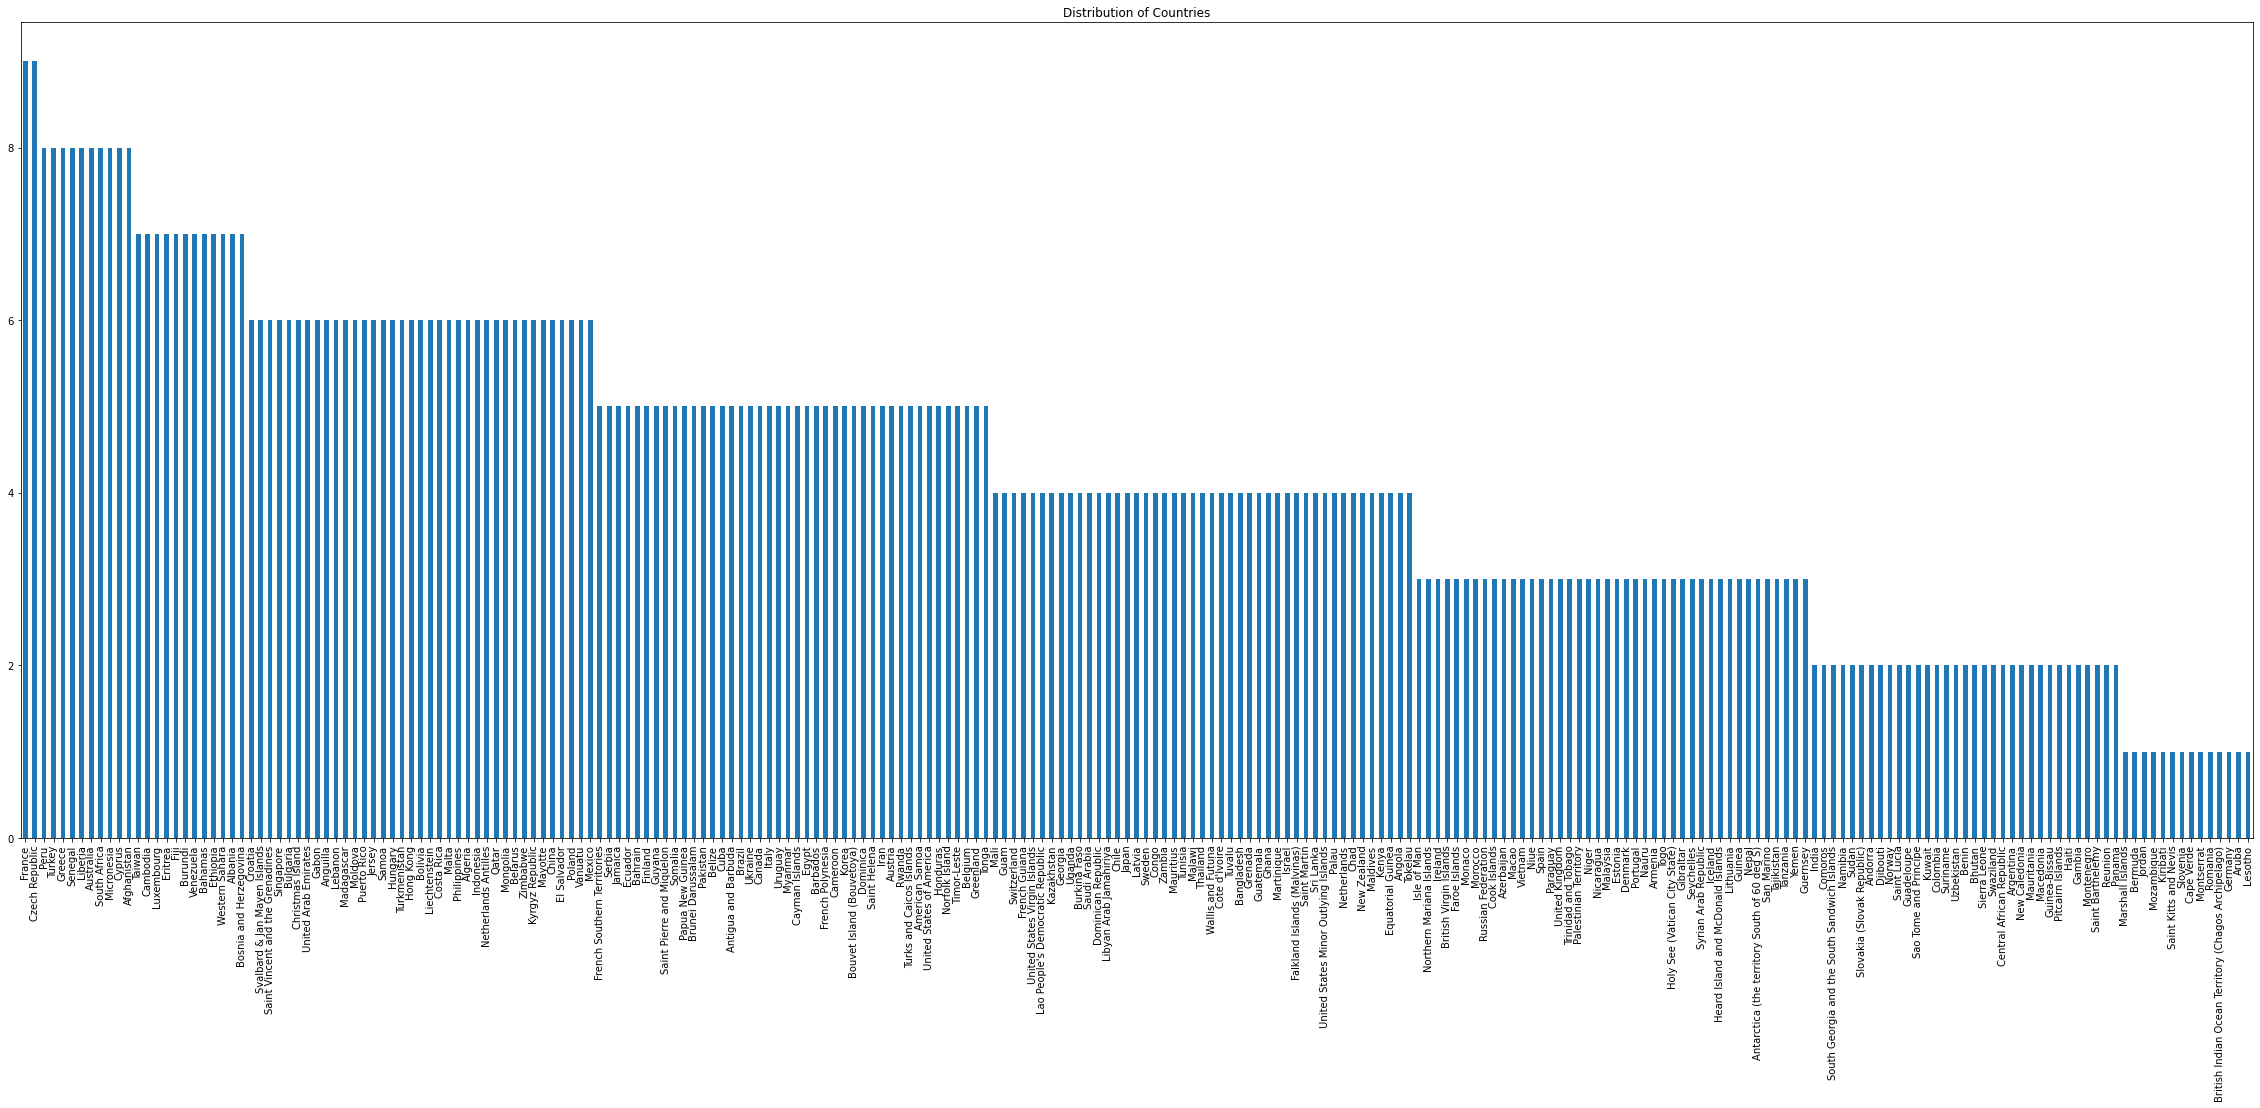

In [ ]:
# 1.10.2 Plot the above distribution:
#        See: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

cntry = ad.Country.value_counts() 
cntry.plot(
           kind = 'bar',
           figsize = (40,15),
           title = "Distribution of Countries"
           ) ;

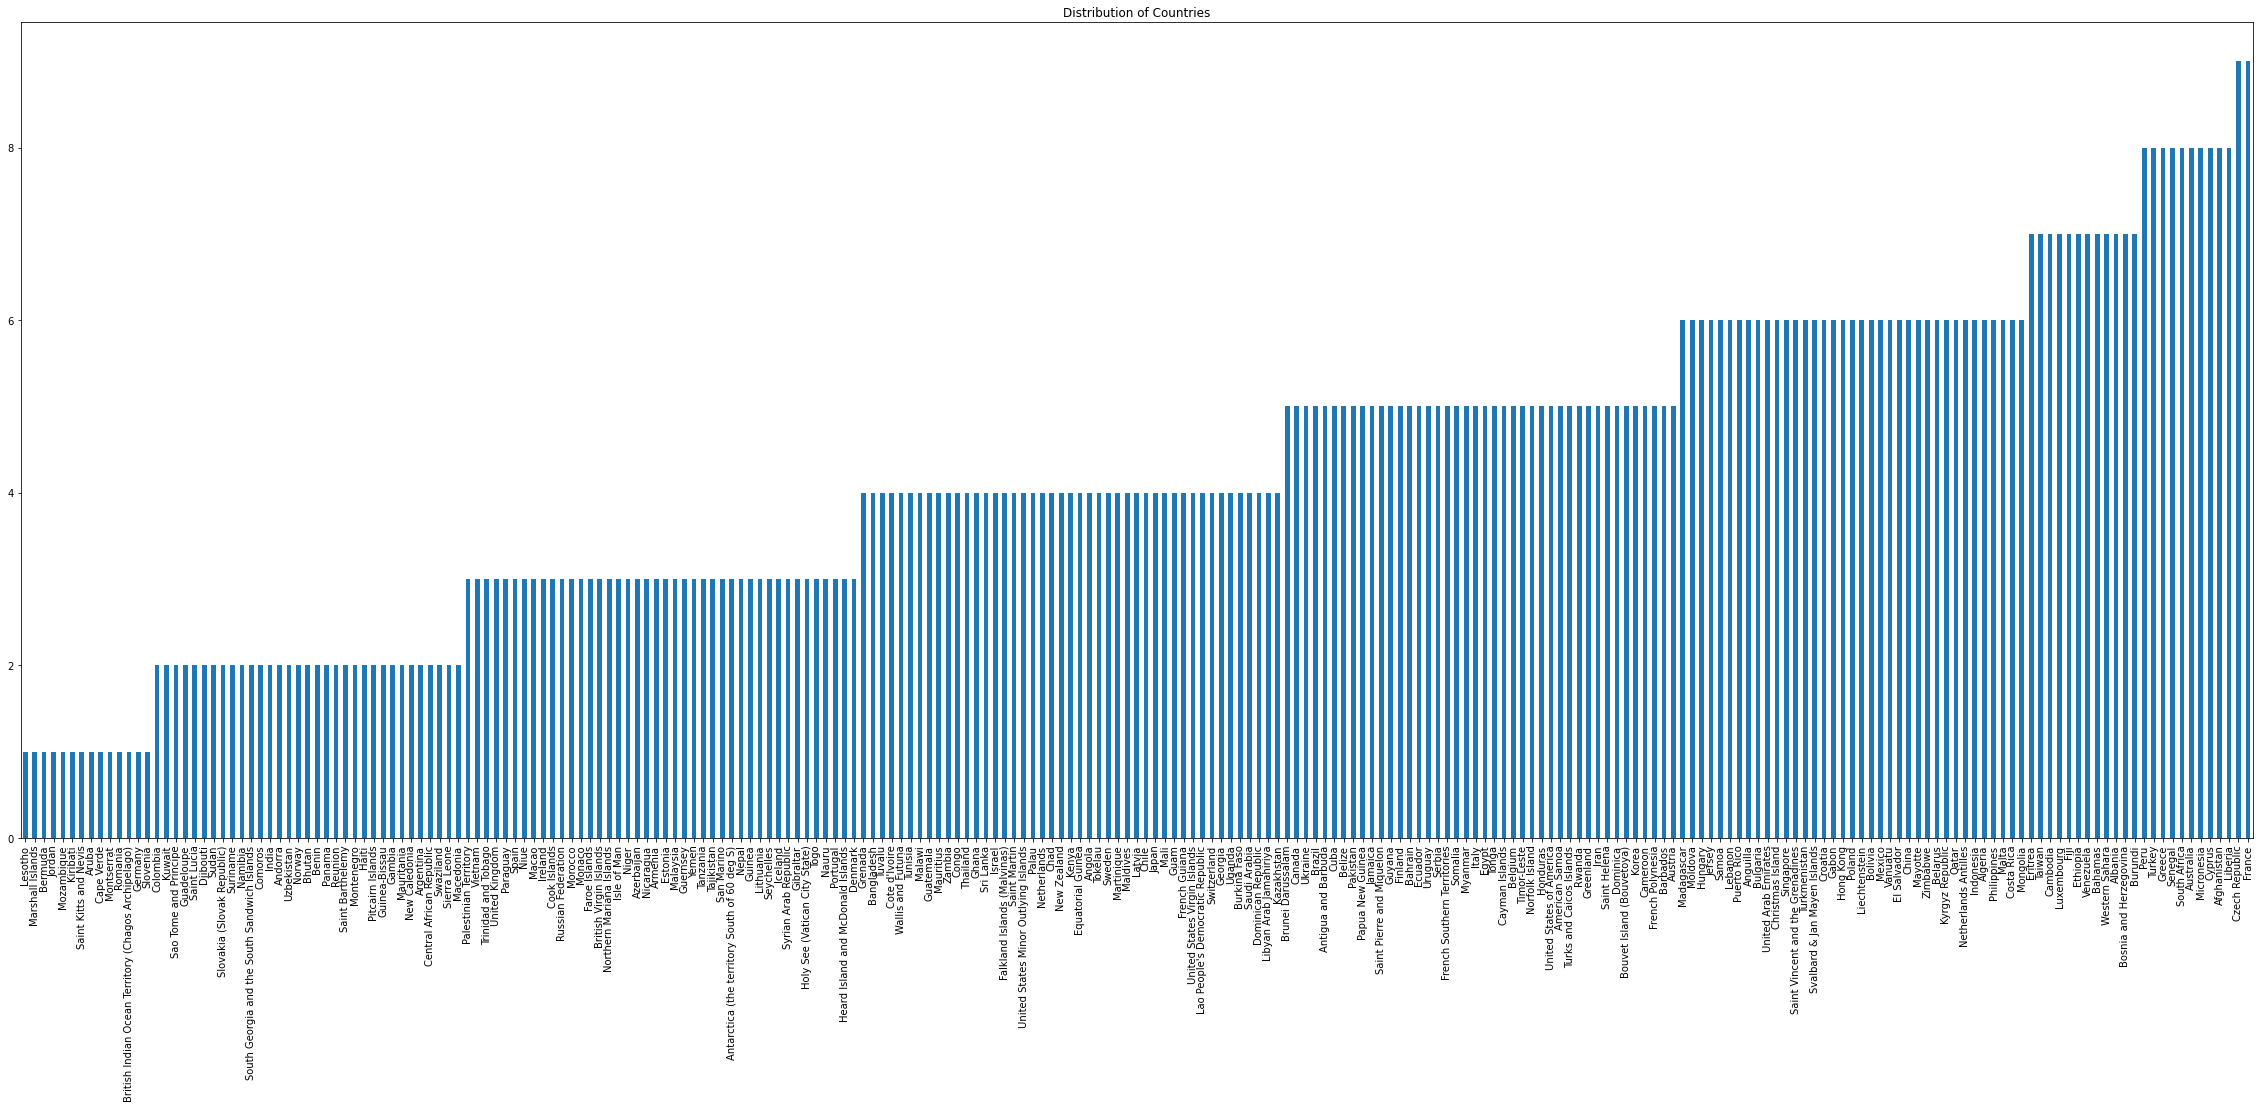

In [ ]:
cntry = ad.Country.value_counts().sort_values(ascending=True) 
cntry.plot(
           kind = 'bar',
           figsize = (40,15),
           title = "Distribution of Countries"
           ) ;

In [ ]:
# 1.10.3 Distribution of gender

ad.Male.value_counts()                  # 519:481


0    519
1    481
Name: Male, dtype: int64

In [ ]:
ad.Male.value_counts(normalize=True)

0    0.519
1    0.481
Name: Male, dtype: float64

In [ ]:
# 1.10.4 Distribution of clicks

ad['Clicked on Ad'].value_counts()      # 1 and 0 in the ratio of 500:500
                                        # This is highly optimistic. Genrally clicks may be 1%


0    500
1    500
Name: Clicked on Ad, dtype: int64

## Save processed data

In [ ]:
# 1.11 Save processed data:
#      csv format
#      Data types on reading will be default(64 bits)

ad.to_csv("ad_processed.csv", index = False)

# 1.12     pickle format
#          Has complete dataframe information
#          including data types
#          File size is more than csv file

ad.to_pickle("ad_processed.pkl")

## Feature Engineering

In [ ]:
ad.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [ ]:
#############################
# 2.0 Engineering  features + More
#############################

## Discretisation
#   a. Cut column 'Age' into 3 equal parts--age_cat
#   b. Cut 'Area Income' into 3 equal parts
#   c. Create a column of length of  'Ad Topic Line'
#   d. Create a column of no of words in  'Ad Topic Line'
## Replace by Category count
#   e. Create a column of 'City' count
#   f. Create a column of 'Country' count
#   g. Create a column of 'City' & 'Country' count
## Date and time columns
#   h. Extract from Timestamp, hour-of-day, weekday, months
## Using 'map'
#   i.Transform 'hour_of_day' to "earlymorning", "morning", "afternoon", "evening", "night","latenight"
#   j. Transform 'weekday' to 0,1,2,3,4,5,6
#   k. Transform months to Qtr1, Qtr2, Qtr3, Qtr4
## Rename columns
#   l. Assign new and shorter column names to a few columns


### Continuous to discrete

#### A quick demo of cut and qcut

In [ ]:
# 1.11
rnd = rng.integers(10,100, size = (16))
rnd.sort()
rnd

array([25, 34, 38, 39, 41, 49, 58, 63, 64, 67, 80, 83, 88, 91, 94, 98])

In [ ]:
demo = pd.DataFrame(rnd,columns=['a'] ) #({'a':rnd}),
demo

,a
0,25
1,34
2,38
3,39
4,41
5,49
6,58
7,63
8,64
9,67


In [ ]:

# 1.12
pd.qcut(demo['a'], q = 4, labels = ['a','b','c','d'])
print("\n---\n")
pd.cut(demo['a'], bins = 4, labels = list('wxyz'))

0     a
1     a
2     a
3     a
4     b
5     b
6     b
7     b
8     c
9     c
10    c
11    c
12    d
13    d
14    d
15    d
Name: a, dtype: category
Categories (4, object): ['a' < 'b' < 'c' < 'd']


---



0     w
1     w
2     w
3     w
4     w
5     x
6     x
7     y
8     y
9     y
10    z
11    z
12    z
13    z
14    z
15    z
Name: a, dtype: category
Categories (4, object): ['w' < 'x' < 'y' < 'z']

In [ ]:
# 1.12
*-+iol,p.q = pd.qcut(demo['a'], q = 4, labels = list('abcd'))
print("\n---\n")
c =pd.cut(demo['a'], bins = 4, labels = list('wxyz'))

SyntaxError: ignored

In [ ]:
# 1.13 Make q and c part of demo dataframe
demo['c'] = c    # Total range: 93. So cuts are at every 93/4= 19.75 interval
                 #  that is (min, min+19.75), (min+19.75, min+39.5)...

demo['q'] = q    # Total count: 16. So cuts are at every 4 numbers 
                 #  that is pts: 4,8,12 and 16
demo

NameError: ignored

#### Transform ad columns now

In [ ]:
# 2.1 Descretise continuos columns
#     These are equal width bins as against
#     equal data-points bins (quantile) or kmeans clusters
#     Alternatively use KBinsDiscretizer of sklearn

ad["age_cat"] = pd.cut(
                       ad['Age'],
                       bins = 3,           # Else devise your bins: [0,20,60,110]
                       labels= ["y", "m", "s"]
                      )


In [ ]:
ad['age_cat']

0      m
1      y
2      y
3      y
4      m
      ..
995    y
996    m
997    s
998    y
999    y
Name: age_cat, Length: 1000, dtype: category
Categories (3, object): ['y' < 'm' < 's']

In [ ]:
ad['age_cat'].value_counts(normalize=True)

y    0.444
m    0.430
s    0.126
Name: age_cat, dtype: float64

In [ ]:
# 2.1.1
ad["area_income_cat"] = pd.cut(
                               ad['Area Income'],
                               bins = 3,
                               labels= ["l", "m", "h"]
                               )


In [ ]:
ad['area_income_cat']

0      h
1      h
2      h
3      m
4      h
      ..
995    h
996    h
997    m
998    m
999    l
Name: area_income_cat, Length: 1000, dtype: category
Categories (3, object): ['l' < 'm' < 'h']

### Feature eng for text column

In [ ]:
# 2.2 Create a new column as per length of each ad-line
#     Both the following lines do the same thing

ad['AdTopicLineLength'] = ad['Ad Topic Line'].apply(lambda x : len(x))
ad['AdTopicLineLength'] = ad['Ad Topic Line'].map(lambda x : len(x))


In [ ]:
# 2.3 Create a new column as per number of words in each ad-line
# Try "good boy".split(" ")  and len("good boy.split(" "))

"good boy".split(" ")             # ['good', 'boy']
print("\n-------\n")
len("good boy".split(" "))        # 2
print("\n-------------\n")
ad['Ad Topic Line'].map(lambda x : len(x.split(" ")))


['good', 'boy']


-------



2


-------------



0      3
1      3
2      3
3      3
4      3
      ..
995    3
996    3
997    3
998    3
999    3
Name: Ad Topic Line, Length: 1000, dtype: int64

In [ ]:
# 2.3.1 Note the use of apply(). This apply() works on complete Series
#       to transform it rather than to summarise it as in groupby.

ad['AdTopicNoOfWords'] = ad['Ad Topic Line'].apply(lambda x : len(x.split(" ")))   # Note the use of apply()
                                                                                   # This apply works on complete Series


In [ ]:
# 2.4 A column that has countd of City and
#       another column with count of Country columns
#       Note the use of transform method here:
#grouped = ad.groupby(['City'])
#ad['City_count'] = grouped['City'].transform('count')   # count is a groupby method

# 2.4.1 Same way for country
#grouped = ad.groupby(['Country'])
#ad['Country_count'] = grouped['Country'].transform('count')   # count is a groupby method


# 2.5 Extract date components using Series.dt accessor
#     https://pandas.pydata.org/pandas-docs/stable/reference/series.html#api-series-dt
#     https://pandas.pydata.org/pandas-docs/stable/reference/series.html#datetime-properties


In [ ]:
ad['Timestamp'].head()

0   2016-03-27 00:53:11
1   2016-04-04 01:39:02
2   2016-03-13 20:35:42
3   2016-01-10 02:31:19
4   2016-06-03 03:36:18
Name: Timestamp, dtype: datetime64[ns]


### Feature Eng for Timestamp

In [ ]:
# 3.0 What is the type of 'dt'

In [ ]:
#  3.0 
type(ad['Timestamp'].dt) # Accessor like get()
                            # pandas.core.indexes.accessors.DatetimeProperties


pandas.core.indexes.accessors.DatetimeProperties

In [ ]:


# 3.1
ad['hour'] = ad['Timestamp'].dt.hour

In [ ]:

ad['hour']

0       0
1       1
2      20
3       2
4       3
       ..
995    21
996     2
997    17
998     2
999    21
Name: hour, Length: 1000, dtype: int64

In [ ]:
# 3.2
pd.cut(ad['hour'], bins = [-1,5,9,12,16,20, 24] , labels= ["em", "m", "d", "af", "ev", "night"])

0         em
1         em
2         ev
3         em
4         em
       ...  
995    night
996       em
997       ev
998       em
999    night
Name: hour, Length: 1000, dtype: category
Categories (6, object): ['em' < 'm' < 'd' < 'af' < 'ev' < 'night']

In [ ]:
# 3.3 Extract hour, weekday and month
ad['hourOfDay']    = ad['Timestamp'].dt.hour
ad['weekday']      = ad['Timestamp'].dt.weekday
ad['quarter']      = ad['Timestamp'].dt.month # First we get month. Then we map month to quarter
                                              #   See below


In [ ]:
ad.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,age_cat,area_income_cat,AdTopicLineLength,AdTopicNoOfWords,hour,hourOfDay,weekday,quarter
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,m,h,34,3,0,0,6,3
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,y,h,34,3,1,1,0,4
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,y,h,32,3,20,20,6,3
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,y,m,37,3,2,2,6,1
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,m,h,29,3,3,3,4,6


In [ ]:
# 4.0
def monthQ(x):
    if 0 < x <= 3:
        return 1            # Quarter 1
    if 3 < x <= 6:
        return 2            # Quarter 2
    if 6 < x <= 9:
        return 3            # Quarter 3
    if 9 < x <= 12:
        return 4            # Quarter 4


In [ ]:
ad['quarter'] = ad['quarter'].map(lambda x : monthQ(x)) 

In [ ]:
ad['month']=ad['month'].apply(lambda x:monthQ(x))

KeyError: ignored

In [ ]:
dx={1:1,2:1,3:1,4:2,5:2,6:2,7:3,8:3,9:3,10:4,11:4,12:4}

ad['quarter1'] = ad['quarter'].map(dx)

In [ ]:
ad[['quarter','quarter1']]

,quarter,quarter1
0,1,1
1,2,1
2,1,1
3,1,1
4,2,1
...,...,...
995,1,1
996,2,1
997,1,1
998,1,1


In [ ]:
# 4.0.1

ad['quarter'] = ad['quarter'].map(lambda x : monthQ(x))   # Which quarter clicked

ad[['Timestamp','quarter']].head(2)   # Just check

,Timestamp,quarter
0,2016-03-27 00:53:11,1
1,2016-04-04 01:39:02,1


### Columns renaming

In [ ]:
# 4.1 So finally what are col names?
ad.columns.values
print("-------\n")
ad.shape               # (1000, 17)  Earlier shape was (1000, 10)


array(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad', 'age_cat', 'area_income_cat',
       'AdTopicLineLength', 'AdTopicNoOfWords', 'hour', 'hourOfDay',
       'weekday', 'quarter', 'quarter1'], dtype=object)

-------



(1000, 19)

In [ ]:
ad.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad', 'age_cat', 'area_income_cat',
       'AdTopicLineLength', 'AdTopicNoOfWords', 'hour', 'hourOfDay', 'weekday',
       'quarter', 'quarter1'],
      dtype='object')

In [ ]:
# 4.2 Let us rename some columns; remove spaces

new_col_names  = {
                 'Daily Time Spent on Site' :  'DailyTimeSpentonSite',
                 'Area Income'              : 'AreaIncome',
                 'Daily Internet Usage'     : 'DailyInternetUsage',
                 'Clicked on Ad'            : 'Clicked_on_ad',
                 'Male'                     : 'Gender'
              }


In [ ]:
# 4.2.1
ad.rename(
         columns = new_col_names,
         inplace = True,
         )


In [ ]:
#4.2.2 Check renaming:
ad.head(3)
ad.columns.values


,DailyTimeSpentonSite,Age,AreaIncome,DailyInternetUsage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked_on_ad,age_cat,area_income_cat,AdTopicLineLength,AdTopicNoOfWords,hour,hourOfDay,weekday,quarter,quarter1
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,m,h,34,3,0,0,6,1,1
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,y,h,34,3,1,1,0,1,1
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,y,h,32,3,20,20,6,1,1


array(['DailyTimeSpentonSite', 'Age', 'AreaIncome', 'DailyInternetUsage',
       'Ad Topic Line', 'City', 'Gender', 'Country', 'Timestamp',
       'Clicked_on_ad', 'age_cat', 'area_income_cat', 'AdTopicLineLength',
       'AdTopicNoOfWords', 'hour', 'hourOfDay', 'weekday', 'quarter',
       'quarter1'], dtype=object)

In [ ]:
ad.pop('xys')

KeyError: ignored

## Plotting

### About plots

In [ ]:
ad.head()

,DailyTimeSpentonSite,Age,AreaIncome,DailyInternetUsage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked_on_ad,age_cat,area_income_cat,AdTopicLineLength,AdTopicNoOfWords,hour,hourOfDay,weekday,quarter,quarter1
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,m,h,34,3,0,0,6,1,1
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,y,h,34,3,1,1,0,1,1
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,y,h,32,3,20,20,6,1,1
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,y,m,37,3,2,2,6,1,1
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,m,h,29,3,3,3,4,1,1


In [ ]:
##################
# 5 Plotting
##################
# A summary of syntax of important plots
#---------------------------------------
# 1. sns.displot()
#    (note: sns.distplot() is depreciated)
# https://seaborn.pydata.org/generated/seaborn.distplot.html
# https://seaborn.pydata.org/generated/seaborn.displot.html#seaborn.displot
# displot(data=None, *, x=None, y=None, hue=None, row=None,
#         col=None, weights=None, kind='hist', rug=False,
#         rug_kws=None, log_scale=None, legend=True, palette=None,
#         hue_order=None, hue_norm=None, color=None, col_wrap=None,
#         row_order=None, col_order=None, height=5, aspect=1, facet_kws=None,
#         **kwargs)
#         kind: 'hist', 'kde', 'ecdf'
###$$$$
# Note: 'displot' DOSES not take 'ax' argument. So if you need to use, 'ax'
#       argument, use: histplot, kdeplot, ecdfplot
###$$$$

In [ ]:
# 2. sns.jointplot()
# http://seaborn.pydata.org/generated/seaborn.jointplot.html
# jointplot(x, y, data=None, kind='scatter',
#          stat_func=None, color=None, height=6, ratio=5, space=0.2,
#          dropna=True, xlim=None, ylim=None, joint_kws=None, marginal_kws=None,
#          annot_kws=None, **kwargs)
#         kind: { “scatter” | “kde” | “hist” | “hex” | “reg” | “resid” }
#
###$$$$
# Note: 'jointplot' DOSES not take 'ax' argument. So if you need to use, 'ax' argument
#       use: scatterplot, kdelot, histplot, regplot, residplot
###$$$$

In [ ]:
# 3. sns.replplot()
# https://seaborn.pydata.org/generated/seaborn.relplot.html
# relplot(x=None, y=None, hue=None, size=None, style=None, data=None, row=None,
#        col=None, col_wrap=None, row_order=None, col_order=None, palette=None,
#        hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None,
#        markers=None, dashes=None, style_order=None, legend='brief', kind='scatter',
#        height=5, aspect=1, facet_kws=None, **kwargs)
#        kind: 'scatter' or 'line'


In [ ]:
# 4. sns.catplot()
# https://seaborn.pydata.org/generated/seaborn.catplot.html
# catplot(*, x=None, y=None, hue=None, data=None, row=None,col=None, col_wrap=None,
#         estimator=<function mean at 0x7fecadf1cee0>, height=5, aspect=1, orient=None,
#         ci=95, n_boot=1000, units=None, seed=None, order=None, hue_order=None,
#         row_order=None, col_order=None, kind='strip',sharex=True, sharey=True,
#         color=None, palette=None, legend=True, legend_out=True,
#         margin_titles=False, facet_kws=None, **kwargs )
#         kind:  “strip”, “swarm”, “box”, “violin”, “boxen”, “point”, “bar”, or “count”
#
###$$$$
# Note: 'catplot' DOSES not take 'ax' argument. So if you need to use, 'ax' argument
#       use: stripplot, swarmplot, boxplot, violinplot,boxenplot,barplot, countplot
###$$$$
#

In [ ]:
# 5. sns.barplot()
#    https://seaborn.pydata.org/generated/seaborn.barplot.html
# barplot(*, x=None, y=None, hue=None, data=None, order=None, hue_order=None,
#         estimator=<function mean at 0x7fecadf1cee0>, ci=95, n_boot=1000,
#         units=None, seed=None, orient=None, color=None, palette=None,
#         saturation=0.75, errcolor='.26', errwidth=None, capsize=None,
#         dodge=True, ax=None, **kwargs)
#
###$$$$
# Note: For plotting counts of a single cat feature, use 'countplot'
#       For summarising another continuous function, against cat-feature
#       use barplot with estimator of np.sum, np.mean etc
###$$$$
#


### Our plotting questions

In [ ]:
####################################
## Plotting questions that we will answer
####################################
#
## 1 Understand your numeric data
##   How is it distributed.

# Question 1: How is Age distributed?
# Question 2: How is DailyTimeSpentonSite distributed?
# Question 3: How is AreaIncome distributed?
# Question 4: Use for loop to draw the distribution plots for the following
#             columns = ['Age', 'AreaIncome', 'DailyInternetUsage', 'DailyTimeSpentonSite']

# 2.0 Relationship of numeric variable with a categorical variable

# Question 5: How is 'Age' related to clicking?
# Question 6: How is DailyInternetUsage related to clicking?
# Question 7: How is 'AreaIncome' related to clicking?
# Question 8: Draw all the following relationship plots at one go:
#               columns = ['Age', 'AreaIncome', 'DailyInternetUsage', 'DailyTimeSpentonSite']
#               catVar = ['Clicked_on_ad', 'age_cat' ]

# 3.0 Relationship of numeric to numeric variables
#     Using jointplots:

# Question 9:  Show joint distribution of DailyTimeSpentonSite and AreaIncome
# Question 10: Show joint distribution of DailyInternetUsage and DailyTimeSpentonSite
# Question 11: Show these plots as kernel density as also 'hex' as also
#              draw regression line

# 4.0 Relationship of a categorical to another categorical variable

# Question 12: What relationship exist between 'Clicked_on_ad' and 'Gender'?
# Question 13: What relationship exist between 'DailyTimeSpentonSite' and 'Gender'?
# Question 14: Relationship between Gender and Clicked_on_ad, subset by 'age_cat wise

# 5.0 Relationship between two categorical and one numeric variable

# Question 15: Hour and weekday wise when are clicks most
# Question 16: Quarter wise and weekday wise when are clicks most
# Question 17: Quarter wise and weekday wise when are DailyInternetUsage max and min

# 6.0 Structure in data
# Question 18: Does data exhibit any pattern with respect to 'Clicked_on_ad'
#              Explore how good the patterns are. Stronger patterns will lead
#              to better classifications
#



### Start plotting

In [ ]:
# 5.0.1 Sample data:
#       This step is academic here. But for large datasets,
#       there is a need to sample data before plotting so
#       that they do not crowd limited X-Y space

dn = ad.sample(frac = 0.5)    # Extract 50% sample of data
dn.shape      # (500,20)

(500, 19)

In [ ]:
# 5.0.1.1
# You can also perform stratified sampling, as:
dn = ad.groupby(
                [ad['Gender'], ad['Country']],
                group_keys = False
                ).apply(lambda x : x.sample(frac=0.5))

In [ ]:
dn

,DailyTimeSpentonSite,Age,AreaIncome,DailyInternetUsage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked_on_ad,age_cat,area_income_cat,AdTopicLineLength,AdTopicNoOfWords,hour,hourOfDay,weekday,quarter,quarter1
448,51.87,50,51869.87,119.65,Team-oriented dynamic forecast,Kevinberg,0,Afghanistan,2016-03-10 22:28:52,1,s,m,30,3,22,22,3,1,1
358,51.38,59,42362.49,158.56,Object-based modular functionalities,East Anthony,0,Afghanistan,2016-06-17 17:11:16,1,s,m,36,3,17,17,4,1,1
367,77.07,40,44559.43,261.02,Face-to-face analyzing encryption,Stephenborough,0,Afghanistan,2016-03-01 10:01:35,0,m,m,33,3,10,10,1,1,1
776,56.46,26,66187.58,151.63,Ameliorated leadingedge help-desk,South Lisa,0,Albania,2016-04-07 18:52:57,1,y,h,33,3,18,18,3,1,1
567,80.38,30,55130.96,238.06,Business-focused holistic benchmark,Port Anthony,0,Albania,2016-03-10 07:07:31,0,y,m,35,3,7,7,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,75.42,26,63373.70,164.25,Optional regional throughput,Millertown,1,Western Sahara,2016-02-26 17:14:14,0,y,h,28,3,17,17,4,1,1
691,87.16,37,50711.68,231.95,Pre-emptive content-based frame,East Donnatown,1,Western Sahara,2016-03-16 20:33:10,0,m,m,31,3,20,20,2,1,1
616,52.70,41,41059.64,109.34,Team-oriented high-level orchestration,New Matthew,1,Zambia,2016-01-31 08:50:38,1,m,m,38,3,8,8,6,1,1
673,49.96,55,60968.62,151.94,Multi-layered user-facing parallelism,South Cynthiashire,1,Zambia,2016-04-04 00:02:20,1,s,h,37,3,0,0,0,1,1


### Distribution plots

In [ ]:
## Task 1 Understand your numeric data
##         How is it distributed.

# Question 1: How is Age distributed?
# Question 2: How is DailyTimeSpentonSite distributed
# Question 3: How is AreaIncome distributed

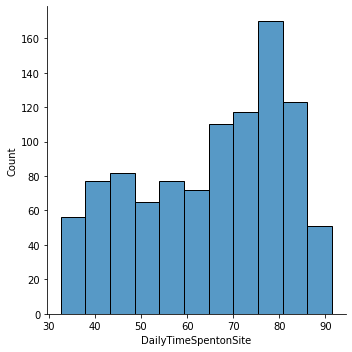

In [ ]:
sns.displot(ad['DailyTimeSpentonSite']);

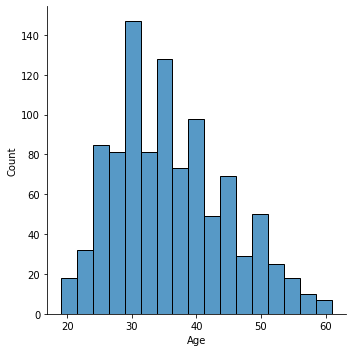

In [ ]:
sns.displot(data=ad,x='Age')

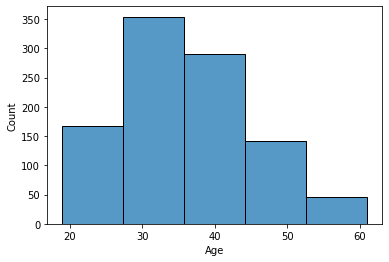

In [ ]:
sns.histplot(data=ad,x='Age',bins=5)

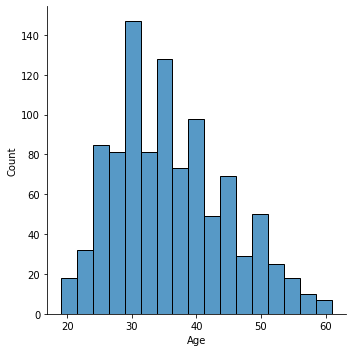

In [ ]:
# 5.1 Distribution of each continuous value using distplot()
#     https://seaborn.pydata.org/generated/seaborn.distplot.html
#     (Does not have **kwargs)

# 5.1.1 Age is slight skewed to right. Naturally density of younger
#       persons is high

sns.displot(ad.Age)

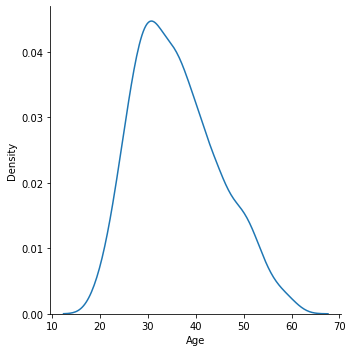

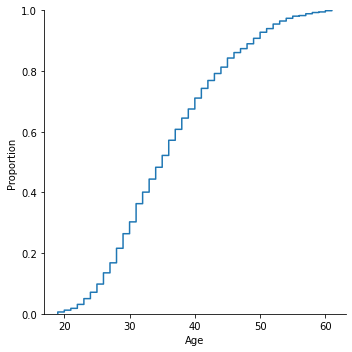

In [ ]:

sns.displot(ad.Age,kind='kde')

sns.displot(ad.Age,kind='ecdf')

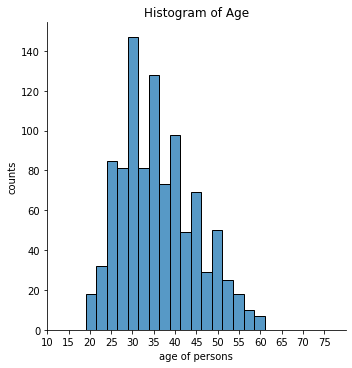

In [ ]:
# 5.1.2 Add more plot configurations
# Refer: https://matplotlib.org/api/axes_api.html#matplotlib-axes
ax= sns.displot(ad.Age)
ax.set( xlim =(10,80),                     #  sns.distplot does not have **kwargs
        xlabel= "age of persons",
        ylabel = "counts",
        title= "Histogram of Age",
        xticks = list(range(0,80,5))
        )

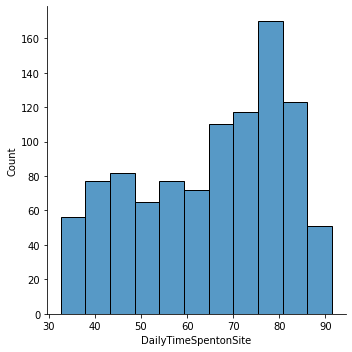

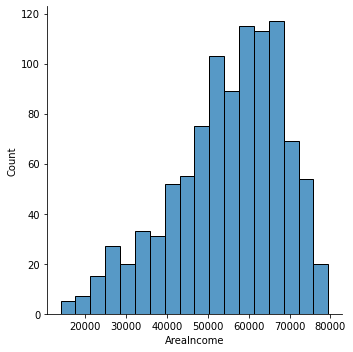

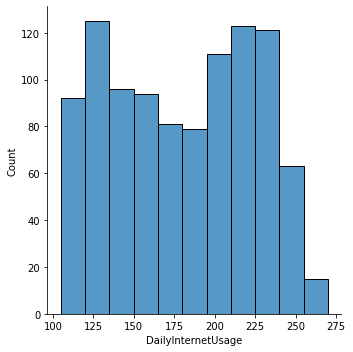

In [ ]:
# 5.1.2 Distribution of DailyTimeSpentonSite
sns.displot(ad['DailyTimeSpentonSite']);
sns.displot(ad['AreaIncome']);
sns.displot(ad['DailyInternetUsage']);

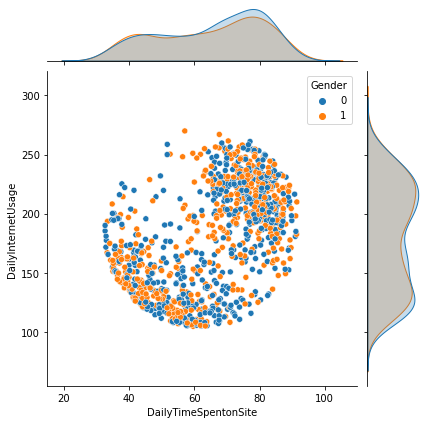

In [ ]:
sns.jointplot(data=ad,x='DailyTimeSpentonSite',y='DailyInternetUsage',hue='Gender',kind='scatter')

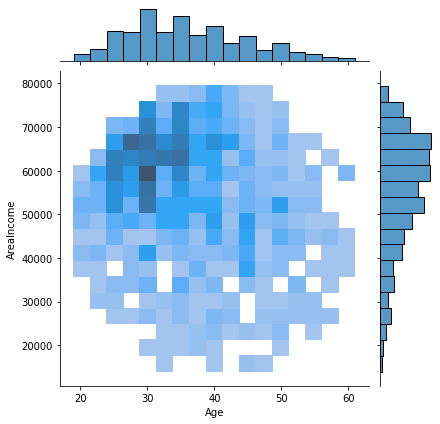

In [ ]:
sns.jointplot(data=ad,x='Age',y='AreaIncome',kind='hist')

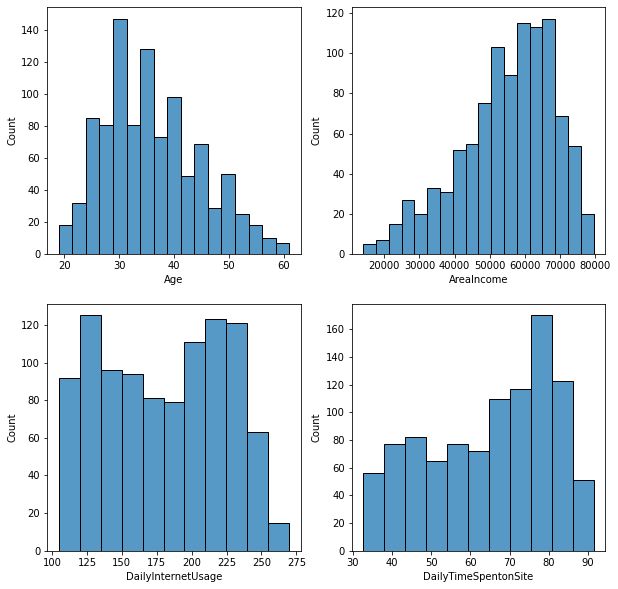

In [ ]:
# 5.1.3 Using for loop to plot all at once
columns = ['Age', 'AreaIncome', 'DailyInternetUsage', 'DailyTimeSpentonSite']
fig,ax = plt.subplots(2,2, figsize = (10,10))
ax = ax.flatten()
for i in range(len(columns)):
    sns.histplot(ad[columns[i]],ax = ax[i])


In [ ]:
ad[['Age','AreaIncome']].describe()

,Age,AreaIncome
count,1000.000000,1000.000000
mean,36.009000,55000.000080
std,8.785562,13414.634022
min,19.000000,13996.500000
25%,29.000000,47031.802500
50%,35.000000,57012.300000
75%,42.000000,65470.635000
max,61.000000,79484.800000


### Box plots

[Diagram explanation](https://www.mathworks.com/matlabcentral/answers/461791-what-do-lines-that-double-back-on-themselves-mean-box-plots#answer_374762)

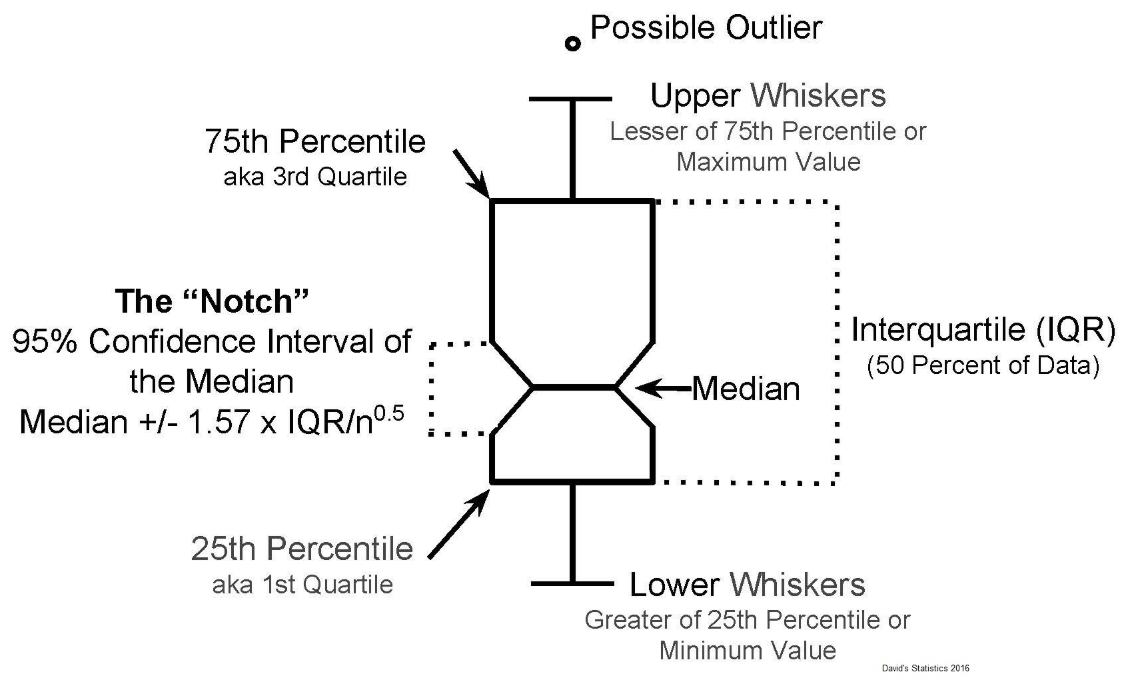

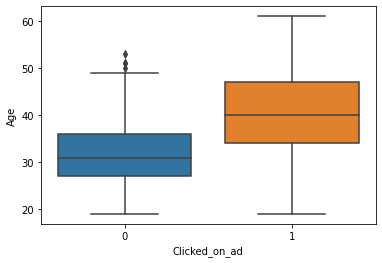

In [ ]:
# 6.0 Relationship of numeric variable with a categorical variable
# Question 4: How is 'Age' related to clicking?
# Question 5: How is DailyInternetUsage related to clicking?
# Question 6: How is 'AreaIncome' related to clicking?
#

# 6.1 One demo plot of relationship of 'Age' with 'Clicked_on_ad'
#     https://seaborn.pydata.org/generated/seaborn.boxplot.html#seaborn.boxplot

sns.boxplot(x = 'Clicked_on_ad',       # Discrete
            y = 'Age',                 # Continuous
            data = ad
            )

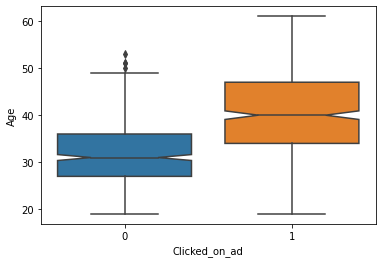

In [ ]:
sns.boxplot(x = 'Clicked_on_ad',       # Discrete
            y = 'Age',                 # Continuous
            data = ad,
            notch = True               # **kwargs. Not all kwargs are permitted
                                       #   From https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.boxplot.html#matplotlib.axes.Axes.boxplot
            )

In [ ]:
# 6.2 More such relationships through for-loop
columns = ['Age', 'AreaIncome', 'DailyInternetUsage', 'DailyTimeSpentonSite']
catVar = ['Clicked_on_ad', 'age_cat' ]


In [ ]:
# 6.3 Now for loop. First create pairs of cont and cat variables
mylist = [(cont,cat)  for cont in columns  for cat in catVar]
mylist


[('Age', 'Clicked_on_ad'),
 ('Age', 'age_cat'),
 ('AreaIncome', 'Clicked_on_ad'),
 ('AreaIncome', 'age_cat'),
 ('DailyInternetUsage', 'Clicked_on_ad'),
 ('DailyInternetUsage', 'age_cat'),
 ('DailyTimeSpentonSite', 'Clicked_on_ad'),
 ('DailyTimeSpentonSite', 'age_cat')]

### Boxen plots

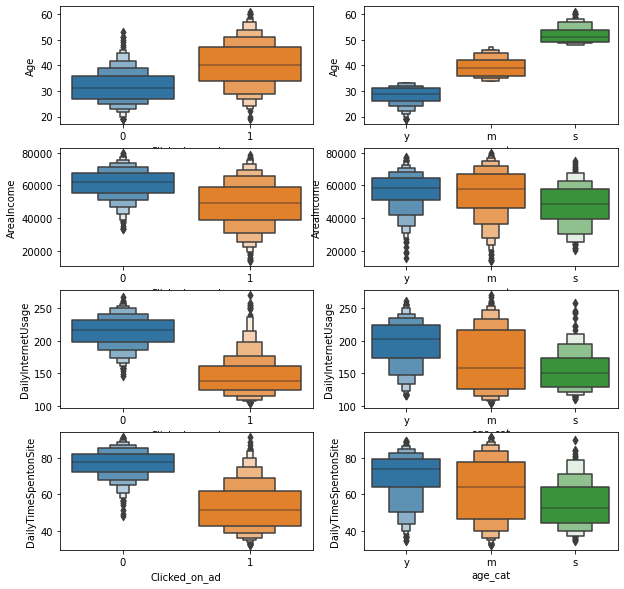

In [ ]:
# 6.4 Now run-through for-loop
#     For boxen plots, see:
#     https://stackoverflow.com/a/65894078/3282777

fig,ax = plt.subplots(4,2,figsize = (10,10))
ax = ax.flatten()
for j in range(len(mylist)):
    sns.boxenplot(x = mylist[j][1], y = mylist[j][0], data = ad, ax = ax[j])


What is a boxen plot?  
See [here](https://stackoverflow.com/questions/52403381/how-boxen-plot-is-different-from-box-plot) for explanations.

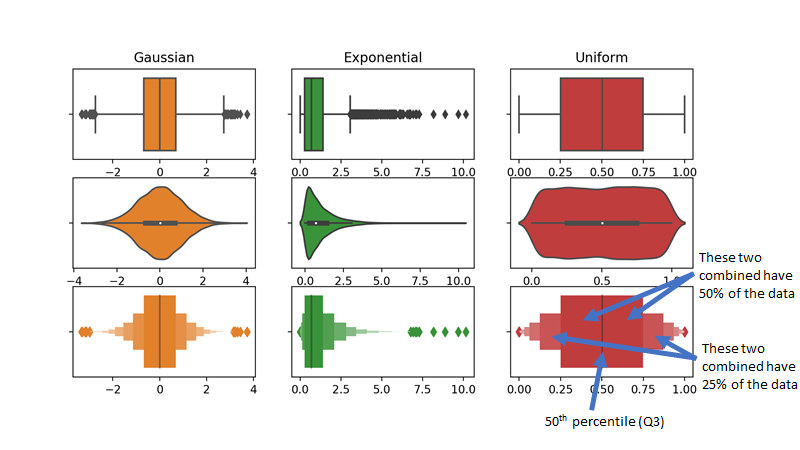

### Joint plots

In [ ]:
# 7.0 Relationship of numeric to numeric variables
#     Using jointplots:
#           While jointplots may not show any linear relationship,
#           they can show by use of contour plots, given X, probable
#           Y through high density areas.

# Question 7: Show joint distribution of DailyTimeSpentonSite and AreaIncome
# Question 8: Show joint distribution of DailyInternetUsage and DailyTimeSpentonSite
# Question 9: Show these plots as kernel density as also 'hex' as also
#             draw regression line
#
# A jointplot = Scatterplot + Density plots

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


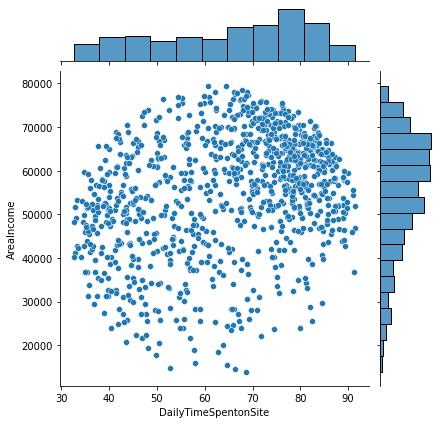

In [ ]:
# 7.1 Open first the following
sns.jointplot(ad.DailyTimeSpentonSite, ad.AreaIncome)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


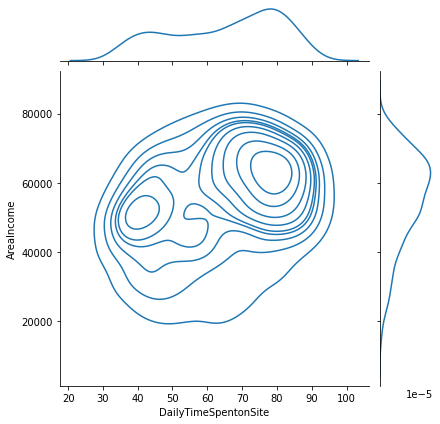

In [ ]:
# 7.2  and then this plot to understand meaning of colour intensity
#         in contour plots?
#      The graph shows that when DailyTimeSpentonSite is around 80
#      there is high probability that AreaIncome is around 60000/-

sns.jointplot(
               ad.DailyTimeSpentonSite, 
               ad.AreaIncome, 
               kind = "kde"        # Try also bw_adjust = 0.25 and then 1.0
               )


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


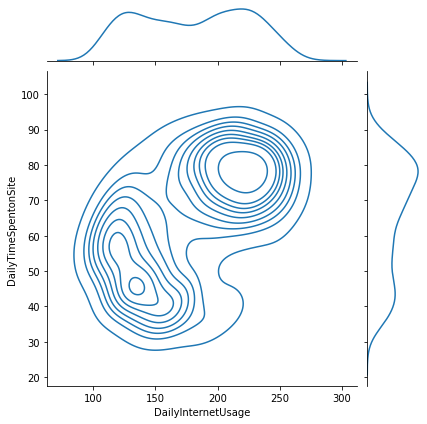

In [ ]:
# 7.3  Clearly two clusters are evident here
sns.jointplot(ad.DailyInternetUsage,
              ad.DailyTimeSpentonSite,
              kind = "kde"
              )


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


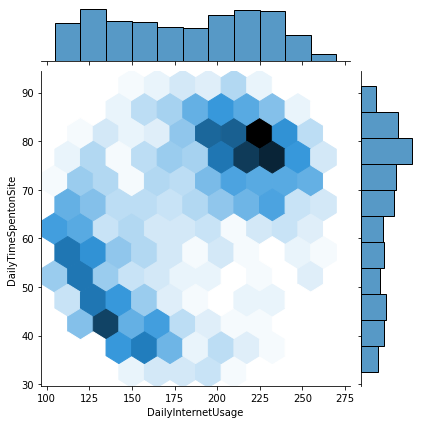

In [ ]:
# 7.4 Or plot hex plot
sns.jointplot(ad.DailyInternetUsage,
              ad.DailyTimeSpentonSite,
              kind = "hex"
              )


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


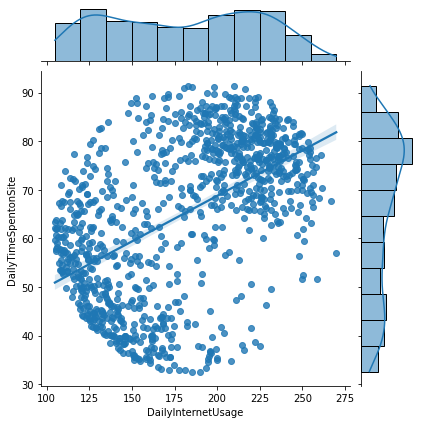

In [ ]:
# 7.5 Add regression and kernel density fits:
sns.jointplot(ad.DailyInternetUsage,
              ad.DailyTimeSpentonSite,
              kind = "reg"
              )


### Replationship plots

#### Bar plot

In [ ]:
# 8.0 Relationship of a categorical to another categorical variable

#     For example per category, count of other categories
#     And relationship of categorical to numeric variables
#     For example, compare per category mean(numeric) or sum(numeric)

# Question 10: What relationship exist between 'Clicked_on_ad' and 'Gender'?
# Question 11: What relationship exist between 'DailyTimeSpentonSite' and 'Gender'?
# Question 12: Relationship between Gender and Clicked_on_ad, subset by 'age_cat wise


In [ ]:
# 8.1 Note how seaborn uses estimator function
#     Barplots are grouped summaries, category wise
#     'estimator' is a summary function
#       For errobars, see this wikpedia on bootstrap statistics
#         https://en.wikipedia.org/wiki/Bootstrapping_(statistics)
#          Bootstrap statistics:
#          Repeatedly draw equal-sized samples of data (bootstrapping)
#           as in RandomForest & using these samples calculate 95% conf
#            interval, for example, np.sum and np.mean in the following cases


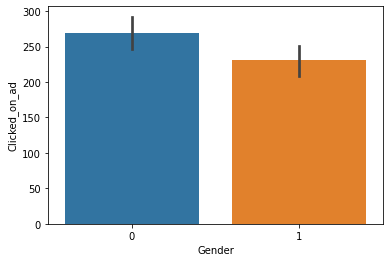

In [ ]:
sns.barplot(x = 'Gender',
            y = 'Clicked_on_ad',
            estimator = np.sum ,     # As there are multiple occurrences of Gender, sum up 'Clicked_on_ad'
            ci = 95,                 # Estimate default confidence interval using bootstrapping
            data = ad,               # Try np.mean also
            #capsize = 1
            )


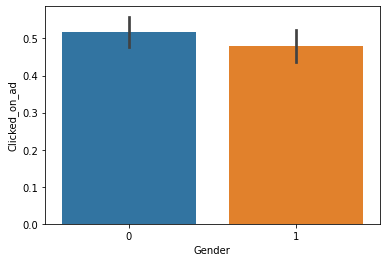

In [ ]:
sns.barplot(x = 'Gender',
            y = 'Clicked_on_ad',
            estimator = np.mean ,     # As there are multiple occurrences of Gender, sum up 'Clicked_on_ad'
            ci = 95,                 # Estimate default confidence interval using bootstrapping
            data = ad,               # Try np.mean also
            #capsize = 1
            )

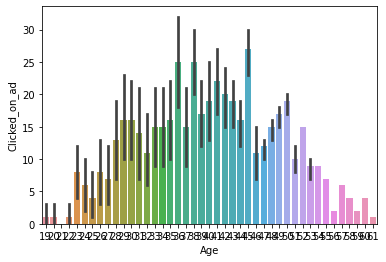

In [ ]:
sns.barplot(    x = 'Age',
              y = 'Clicked_on_ad',
                      estimator = np.sum,
            ci = 95,
            data =ad,
            
            )

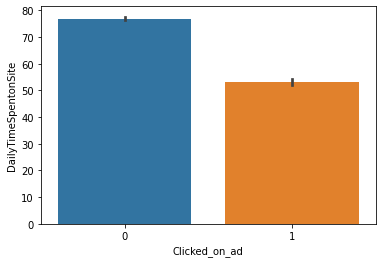

In [ ]:
# 8.2 Multiple ways of plotting similar information
sns.barplot(x = 'Clicked_on_ad',
            y = 'DailyTimeSpentonSite',
            estimator = np.mean,
            ci = 95,
            data =ad
            )


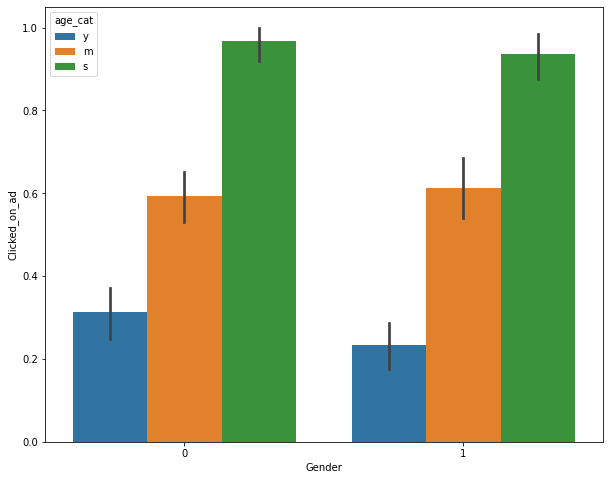

In [ ]:
# 8.3 Multiple ways of plotting similar information
fig = plt.figure(figsize = (10,8))
sns.barplot(x = 'Gender',
            y = 'Clicked_on_ad',
            hue = 'age_cat',       # Age-cat wise plots
            estimator = np.mean,
            ci = 95,
            data =ad)


In [ ]:
# 9.0 Relationship between two categorical and one numeric variable
#     Numeric variable has to be some summary measure. So, we have
#     to first calculate this summary measure
#
#     Matrix plots or heatmap
#    #########################

# Question 13: Hour and weekday wise when are clicks most
# Question 14: Quarter wise and weekday wise when are clicks most
# Question 15: Quarter wise and weekday wise when are DailyInternetUsage max and min

#### Heat maps

In [ ]:
# 9.1 When are total clicks more
#     Heatmap of hour vs weekday
#     X and Y labels are DataFrame indexes

grouped = ad.groupby(['hour', 'weekday'])
df_wh = grouped['Clicked_on_ad'].sum().unstack()
df_wh

weekday,0,1,2,3,4,5,6
hour,,,,,,,
0,5,4,5,2,6,1,3
1,3,1,2,2,4,1,3
2,2,1,4,4,1,1,4
3,2,4,5,3,2,2,5
4,3,1,5,2,1,5,4
5,0,1,6,2,6,3,3
6,1,4,3,4,5,2,4
7,5,5,5,2,3,2,4
8,6,2,0,3,4,2,4


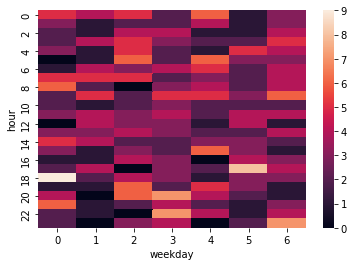

In [ ]:
# 9.2 Draw quickly the heatmap. For drawing heatmap,
#     When Pandas DataFrame is provided, the index & column
#     of DataFrame will be used to label the columns and rows
#      of heatmap.
#
sns.heatmap(df_wh)

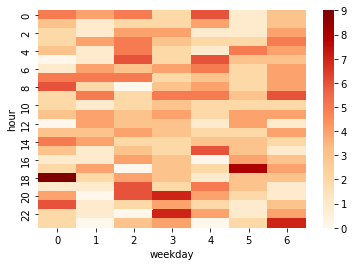

In [ ]:
# 9.2.1 For list of ready-made cmaps (plt.cm...), see:
#       https://matplotlib.org/tutorials/colors/colormaps.html
sns.heatmap(df_wh, cmap = plt.cm.OrRd)

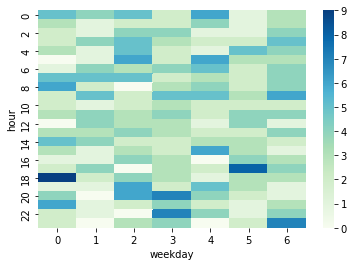

In [ ]:
sns.heatmap(df_wh, cmap = plt.cm.GnBu)

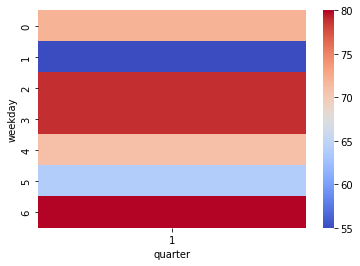

In [ ]:


# 9.3 Quarter vs weekday
grouped = ad.groupby(['weekday','quarter'])
df_wq = grouped['Clicked_on_ad'].sum().unstack()
sns.heatmap(df_wq, cmap = plt.cm.coolwarm)

quarter,1
weekday,
0,181.657429
1,181.668852
2,176.209487
3,176.971690
4,183.039226
5,176.121349
6,183.795157


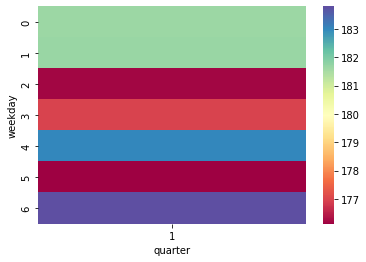

In [ ]:
# 9.4 In which quarter daily Internet usage is more
#     It is single categorical feature vs numeric summary
#     Appropriate plot is boxplot. So we add, one more
#     feature of 'weekday'
grouped = ad.groupby([ 'weekday','quarter'])
df_wqd = grouped['DailyInternetUsage'].mean().unstack()
df_wqd
sns.heatmap(df_wqd, cmap = plt.cm.Spectral)


### cat plots

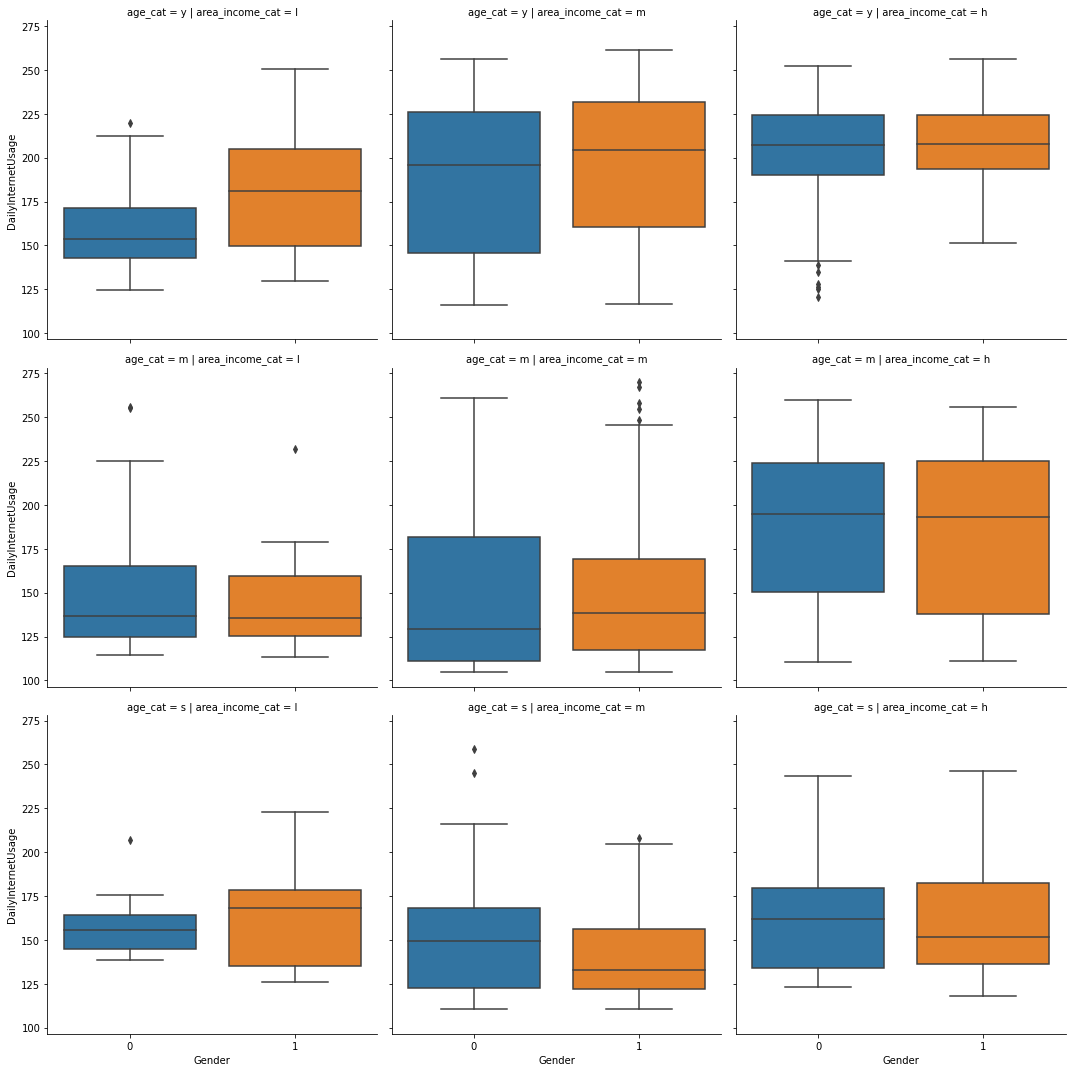

In [ ]:
# 10.0 Faceted plots: Show facets of relationships between
#      by numerous categorical variables
#      Facet plots
#      READ 'catplot' AS CONDITIONAL PLOTS

# 10.1
sns.catplot(x = 'Gender',
            y = 'DailyInternetUsage',
            row = 'age_cat' ,
            col = 'area_income_cat',
            kind = 'box',
            estimator = np.sum,
            data = ad)



### Faceted plots

In [ ]:
# 10.0 Faceted plots: Show facets of relationships between
#      by numerous categorical variables
#      Facet plots
#      READ 'catplot' AS CONDITIONAL PLOTS

# 10.1
sns.catplot(x = 'Gender',
            y = 'DailyInternetUsage',
            row = 'age_cat' ,
            col = 'area_income_cat',
            kind = 'box',
            estimator = np.sum,
            data = ad)




In [ ]:
# 10.2
sns.catplot(x = 'age_cat',
            y = 'DailyInternetUsage',
            row = 'area_income_cat',
            col = 'Clicked_on_ad',
            estimator = np.mean ,
            kind = 'box',
            data =ad)



### rel plots

In [ ]:
# 10.3 Faceted scatter plots or relationship plots
sns.relplot(x = 'Age', y = 'DailyInternetUsage', row = 'area_income_cat', col = 'weekday', kind = 'scatter', data = ad)
sns.relplot(x = 'Age', y = 'DailyInternetUsage', hue = 'area_income_cat',  kind = 'scatter', data = ad, cmap = 'winter')
sns.relplot(x = 'Age', y = 'DailyInternetUsage', hue = 'area_income_cat', size = 'weekday', kind = 'scatter', data = ad)
sns.relplot(x = 'Age', y = 'DailyInternetUsage', hue = 'hour', kind = 'scatter', data = ad)
sns.relplot(x = 'Age', y = 'DailyInternetUsage', row = 'hour', kind = 'scatter', data = ad)



In [ ]:
# Also store the processed data for further use:


In [ ]:
############ End #####################

In [ ]:
import pandas as pd
import numpy as np
import os

In [ ]:
xyz=pd.Series([30,50,70])

In [ ]:
xyz

In [ ]:
xyz*xyz

In [ ]:
out=xyz.apply(lambda x:x*x)

In [ ]:
out

In [ ]:
xxz=pd.Series(['this is me','my name is abc','who are u'])

In [ ]:
xxz

In [ ]:
abc=xxz.apply(lambda x:len(x))

In [ ]:
abc

In [ ]:
t="this is a sentence98"

In [ ]:
t.split(" ")

In [ ]:
len(t.split(" "))

In [ ]:
a=xxz.apply(lambda x:len(x.split(" ")))

In [ ]:
a